In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
yelp = pd.read_csv('yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [4]:
yelp.corr()

,stars,cool,useful,funny
stars,1.000000,0.052555,-0.023479,-0.061306
cool,0.052555,1.000000,0.887102,0.764342
useful,-0.023479,0.887102,1.000000,0.723406
funny,-0.061306,0.764342,0.723406,1.000000


In [5]:
yelp['Text Length'] = yelp['text'].apply(len)

In [6]:
yelp.corr()

,stars,cool,useful,funny,Text Length
stars,1.000000,0.052555,-0.023479,-0.061306,-0.114674
cool,0.052555,1.000000,0.887102,0.764342,0.241451
useful,-0.023479,0.887102,1.000000,0.723406,0.293975
funny,-0.061306,0.764342,0.723406,1.000000,0.251760
Text Length,-0.114674,0.241451,0.293975,0.251760,1.000000


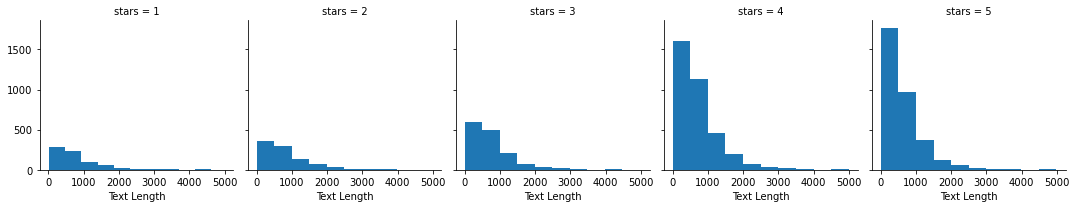

In [7]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'Text Length')

<AxesSubplot:xlabel='cool', ylabel='useful'>

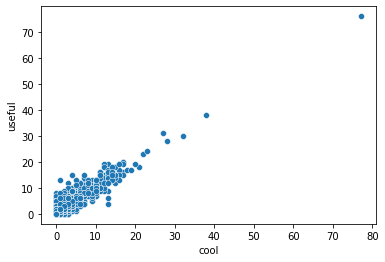

In [8]:
sns.scatterplot(data=yelp,x='cool',y='useful')

In [9]:
yelp['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [10]:
import string
from nltk.corpus import stopwords
def text_preprocess(st):

    no_punc = [i for i in st if i not in string.punctuation]
    no_punc = ''.join(no_punc)
    for i in no_punc:
        new_st = no_punc.rstrip('\n\n')
    return [i for i in new_st.split() if i not in stopwords.words('english')]

In [11]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars']==5)]
yelp_class['stars'].value_counts()
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  Text Length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_preprocess)),
    ('Classifier', MultinomialNB())
])

In [22]:
from sklearn.model_selection import train_test_split
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [23]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocess at 0x0000017C84C7A8B8>)),
                ('Classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(X_test)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.93      0.61      0.73       228
           5       0.92      0.99      0.95       998

    accuracy                           0.92      1226
   macro avg       0.92      0.80      0.84      1226
weighted avg       0.92      0.92      0.91      1226

